# Mi primera regresión logística


## Importar librerías


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_digits


from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split



from sklearn.preprocessing import StandardScaler

## Carga de datos

load_digits es un conjunto de datos de dígitos escritos a mano que consta de 1.797 imágenes de resolución 8x8 píxeles, cada píxel está representado como un valor en escala de grises entre 0 y 16.

Las etiquetas corresponden a los números enteros del 0 al 9, por lo que es útil para tareas de clasificación multiclase y es comúnmente utilizado como un ejemplo introductorio en la clasificación de imágenes en Machine Learning.

![Una mirada a nuestros datos](https://camo.githubusercontent.com/57212f22d80d70c7ae10a35b8e8d99ecdafa7890cad9a0e9dd775cbf1de24b59/68747470733a2f2f757365722d696d616765732e67697468756275736572636f6e74656e742e636f6d2f383736343638332f35393936323632392d30643363653738302d393532332d313165392d386232312d3566666339633538386664372e706e67)


In [2]:
# Load the digits dataset from scikit-learn.
digits = load_digits()

In [3]:
# El primer digito en nuestro data point
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [4]:
# Le hacemos reshape en base a la documentacion
image = np.reshape(digits.data[0], (8, 8))

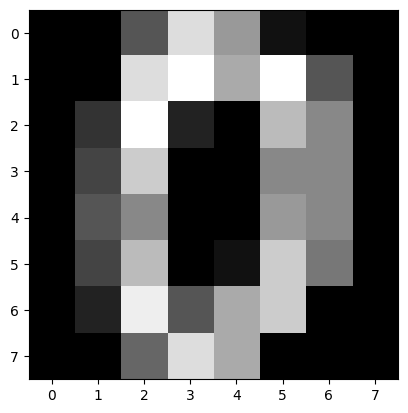

In [5]:
# Mostrar la imagen en matplotlib
plt.imshow(image, cmap="gray")
plt.show()

In [6]:
# De esta manera podemos saber que digito es
# Variable objetivo a predecir en base a las imagenes
digits.target[0]

0

## Split de datos en **train y test**

Al hacer un split de datos en train y test, separamos nuestro conjunto de datos en dos partes:

- **train**: para entrenar el modelo.

- **test**: para evaluar el desempeño del modelo.

Esto nos permite evaluar la capacidad de nuestro modelo para generalizar a datos nuevos y no vistos durante el entrenamiento.


In [7]:
# Separar el conjunto de datos en train y test

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.20, random_state=0
)

In [8]:
X_test.shape
# 360 -> filas
# 64 -> columnas

(360, 64)

In [8]:
print(
    f"""X_train: {X_train.shape}
y_train: {y_train.shape}

X_test: {X_test.shape}
y_test: {y_test.shape}"""
)

X_train: (1437, 64)
y_train: (1437,)

X_test: (360, 64)
y_test: (360,)


## Entreamiento de modelo


In [9]:
model = LogisticRegression(max_iter=10000)

# Entretamiento sobre el conjunto de entrenamiento
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

## Evaluación del modelo


In [10]:
# Tiene las predicciones de x_test
y_pred = model.predict(X_test)

In [11]:
model.score(X_test, y_test) * 100

96.94444444444444

In [12]:
cm = confusion_matrix(y_test, y_pred)

In [13]:
# Diagonal principal
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]], dtype=int64)

## Visualizacion de nuestras predicciones


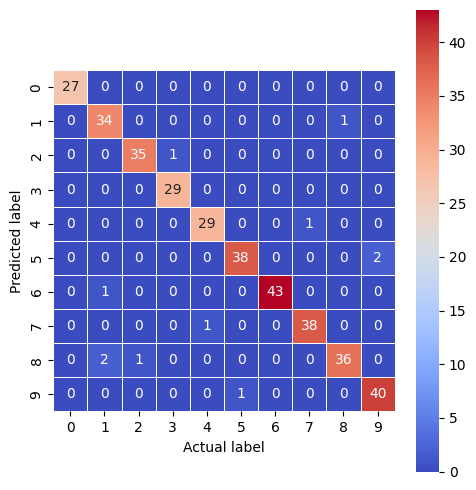

In [14]:
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidths=0.5, square=True, cmap="coolwarm")
plt.ylabel("Predicted label")
plt.xlabel("Actual label")
plt.tight_layout()
plt.show()

n nuestra evaluación del modelo logístico, obtuvimos una alta precisión y la mayoría de las predicciones fueron correctas.

Nuestro modelo obtuvo un accuracy_score del 96.6%, lo que indica que es capaz de predecir correctamente la categoría del número en la mayoría de las veces.


## ESTANDARIZAR LOS DATOS


In [15]:
# Estandarizar los datos
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

sc_x = StandardScaler().fit(X_train)
x_train_std = sc_x.transform(X_train)
x_test_std = sc_x.transform(X_test)


# Entrenar el modelo
model = LogisticRegression(max_iter=10000)

model.fit(x_train_std, y_train)

LogisticRegression(max_iter=10000)

In [16]:
y_pred = model.predict(x_test_std)

In [17]:
model.score(x_test_std, y_test) * 100

96.11111111111111

In [18]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0,  0,  3,  1],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]], dtype=int64)

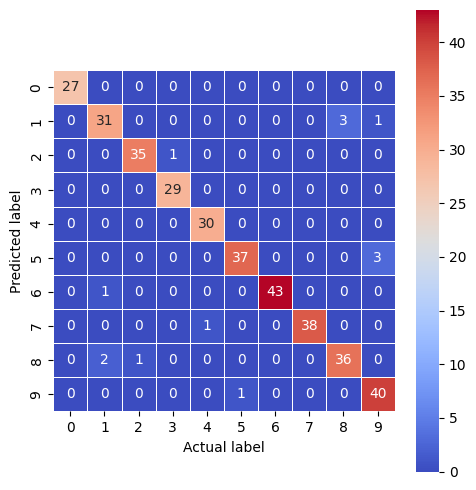

In [19]:
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidths=0.5, square=True, cmap="coolwarm")
plt.ylabel("Predicted label")
plt.xlabel("Actual label")
plt.tight_layout()
plt.show()

## Carguemos nuestros propios números

Implementaremos un código que permitirá cargar imágenes hechas a mano y utilizar el modelo de regresión logística previamente entrenado para predecir qué dígito corresponde a cada imagen. Luego, se visualizará cada imagen con su respectiva predicción.

Si deseas replicarlo puedes probar con tus propias imagenes y ver si predice bien o no las imagenes.

```Python
from PIL import Image # Importamos la librería PIL para trabajar con imágenes
import numpy as np # Importamos numpy para manejar los datos de las imágenes

def classify(img_path):
  image_raw = Image.open(img_path).convert('L') # Abrimos la imagen y la convertimos a escala de grises
  image_procesed = image_raw.resize((8,8)) # Redimensionamos la imagen a una de 8x8 pixeles
  image_procesed = [np.array(image_procesed).flatten()] # Aplanamos la imagen y la convertimos a un arreglo numpy
  prediction = logistic_reg.predict(image_procesed)[0] # Predecimos con el modelo previamente entrenado
  return image_raw, prediction
```

```python
import matplotlib.pyplot as plt
import os

path = './handmade_digits'
files = os.listdir(path)

fig, ax = plt.subplots(2, 5, figsize=(12,6))

for i in range(2):
    for j in range(5):
        img,pred, = classify(f'./handmade_digits/{files[i*5+j]}')
        ax[i, j].imshow(img, cmap='gray')
        ax[i, j].axis('off')
        ax[i, j].set_title(f'\n The image has a {pred}')
```

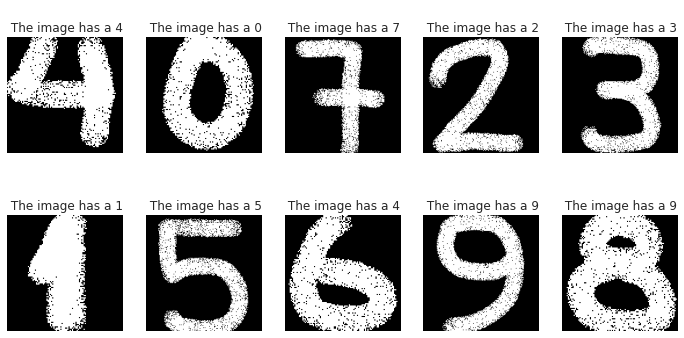


Después de cargar nuestros propios números y probarlos con el modelo de regresión logística, se obtuvo una predicción correcta para la mayoría de las imágenes. Sin embargo, el número 8 fue confundido con un 9 y el número 6 fue confundido con un 4.
